<a href="https://colab.research.google.com/github/himanshugupta09/Plant_identification/blob/main/Plant_speci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!pip list
#!pip install timm
#!pip install torchvision cuda92

In [ ]:
#!pip install arcgis
#!pip list
%env ARCGIS_ENABLE_TF_BACKEND=1

env: ARCGIS_ENABLE_TF_BACKEND=1


In [ ]:
%load_ext tensorboard

import datetime
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

import cv2
import urllib
import requests
import PIL.Image
import numpy as np

In [ ]:
# Define data paths
train_data_dir = "/content/drive/MyDrive/Colab Notebooks/train"
val_data_dir = "/content/drive/MyDrive/Colab Notebooks/validation"
test_data_dir = "/content/drive/MyDrive/Colab Notebooks/test"

In [ ]:
# img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/validation/Bellyache bush (Green)/004_20.jpg",1)
# plt.imshow(img)
# shp = np.array(img)
# print(shp.shape)

In [ ]:
# class AlexNet(Sequential):
#     def __init__(self, input_shape, num_classes):
#         super().__init__()

#         self.add(Conv2D(96, kernel_size=(11,11), strides= 4,
#                         padding= 'valid', activation= 'relu',
#                         input_shape= input_shape,
#                         kernel_initializer= 'he_normal'))
#         self.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
#                               padding= 'valid', data_format= None))

#         self.add(Conv2D(256, kernel_size=(5,5), strides= 1,
#                         padding= 'same', activation= 'relu',
#                         kernel_initializer= 'he_normal'))
#         self.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
#                               padding= 'valid', data_format= None))

#         self.add(Conv2D(384, kernel_size=(3,3), strides= 1,
#                         padding= 'same', activation= 'relu',
#                         kernel_initializer= 'he_normal'))

#         self.add(Conv2D(384, kernel_size=(3,3), strides= 1,
#                         padding= 'same', activation= 'relu',
#                         kernel_initializer= 'he_normal'))

#         self.add(Conv2D(256, kernel_size=(3,3), strides= 1,
#                         padding= 'same', activation= 'relu',
#                         kernel_initializer= 'he_normal'))

#         self.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
#                               padding= 'valid', data_format= None))

#         self.add(Flatten())
#         self.add(Dense(4096, activation= 'relu'))
#         self.add(Dense(4096, activation= 'relu'))
#         self.add(Dense(1000, activation= 'relu'))
#         self.add(Dense(num_classes, activation= 'softmax'))

#         self.compile(optimizer= tf.keras.optimizers.Adam(0.001),
#                     loss='categorical_crossentropy',
#                     metrics=['accuracy'])

In [ ]:
# train_datagen = ImageDataGenerator(rescale=1.0/255,
#                                   zoom_range=0.2,
#                                   width_shift_range=0.2,
#                                   height_shift_range=0.2,
#                                   fill_mode='nearest')
# train_generator = train_datagen.flow_from_directory(train_data_dir,
#                                                    target_size=(224, 224),
#                                                    batch_size=32,
#                                                    class_mode='categorical',
#                                                    shuffle=True)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  fill_mode='nearest')
test_generator = test_datagen.flow_from_directory(test_data_dir,
                                                   target_size=(224, 224),
                                                   batch_size=32,
                                                   class_mode='categorical',
                                                   shuffle=False)

Found 972 images belonging to 74 classes.


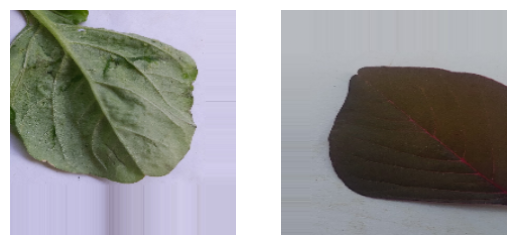

In [ ]:
num_images_to_plot = 2
for i in range(num_images_to_plot):
    batch = test_generator.next()
    image = batch[0][0]  # Take the first image from the batch
    plt.subplot(1, num_images_to_plot, i + 1)
    plt.imshow(image)
    plt.axis('off')

plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler, TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import datetime
from keras.layers import Activation
# Define a learning rate schedule
initial_lr = 0.001

def lr_schedule(epoch):
    lr = initial_lr
    if epoch > 10:
        lr *= 0.1
    if epoch > 20:
        lr *= 0.1
    return lr

# Model definition
class AlexNet(Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()

        self.add(Conv2D(96, kernel_size=(11, 11), strides=4,
                        padding='valid', activation='relu',
                        input_shape=input_shape,
                        kernel_initializer='he_normal'))
        self.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2),
                              padding='valid', data_format=None))

        self.add(Conv2D(256, kernel_size=(5, 5), strides=1,
                        padding='same', activation='relu',
                        kernel_initializer='he_normal'))
        self.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2),
                              padding='valid', data_format=None))

        self.add(Conv2D(384, kernel_size=(3, 3), strides=1,
                        padding='same', activation='relu',
                        kernel_initializer='he_normal'))

        self.add(Conv2D(384, kernel_size=(3, 3), strides=1,
                        padding='same', activation='relu',
                        kernel_initializer='he_normal'))

        self.add(Conv2D(256, kernel_size=(3, 3), strides=1,
                        padding='same', activation='relu',
                        kernel_initializer='he_normal'))

        self.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2),
                              padding='valid', data_format=None))

        self.add(Flatten())
        self.add(Dense(512, activation='relu'))
        self.add(BatchNormalization())
        self.add(Dense(256, activation='relu'))
        self.add(BatchNormalization())
        self.add(Dense(128, activation='relu'))
        self.add(Dense(num_classes, activation='softmax'))

        optimizer = Adam(learning_rate=initial_lr)
        self.compile(optimizer=optimizer,
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Define data generators


In [ ]:

# # training parameters
# EPOCHS =
BATCH_SIZE = 32
image_height = 224
image_width = 224
# train_dir = "./content/train"
# # valid_dir = "./content/validation"
# # model_dir = "./my_model.h5"

train_datagen = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=10,
                  width_shift_range=0.1,
                  height_shift_range=0.1,
                  shear_range=0.1,
                  zoom_range=0.1)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(image_height, image_width),
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=1,
                                                    shuffle=True,
                                                    class_mode="categorical")
valid_datagen = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid_datagen.flow_from_directory(val_data_dir,
                                                    target_size=(image_height, image_width),
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=7,
                                                    shuffle=True,
                                                    class_mode="categorical"
                                                    )
train_num = train_generator.samples
valid_num = valid_generator.samples

Found 4183 images belonging to 74 classes.
Found 866 images belonging to 74 classes.


In [ ]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : Amaranthus Green
1 : Amaranthus Red
2 : Asthma Plant
3 : Avaram
4 : Balloon vine
5 : Bellyache bush (Green)
6 : Benghal dayflower
7 : Betel Leaves
8 : Big Caltrops
9 : Black Night Shade
10 : Black-Honey Shrub
11 : Bristly Wild Grape
12 : Butterfly Pea
13 : Cape Gooseberry
14 : Celery
15 : Chinese Spinach
16 : Common Wireweed
17 : Coriander Leaves
18 : Country Mallow
19 : Crown flower
20 : Curry Leaf
21 : Dwarf Copperleaf (Green)
22 : Dwarf copperleaf (Red)
23 : False Amarnath
24 : Fenugreek Leaves
25 : Giant Pigweed
26 : Gongura
27 : Green Chireta
28 : Holy Basil
29 : Indian CopperLeaf
30 : Indian Jujube
31 : Indian Sarsaparilla
32 : Indian Stinging Nettle
33 : Indian Thornapple
34 : Indian pennywort
35 : Indian wormwood
36 : Ivy Gourd
37 : Kokilaksha
38 : Lagos Spinach
39 : Lambs Quarters
40 : Land Caltrops (Bindii)
41 : Lettuce Tree
42 : Madagascar Periwinkle
43 : Madras Pea Pumpkin
44 : Malabar Catmint
4

In [ ]:
# validation_datagen = ImageDataGenerator(rescale=1.0/255)
# validation_generator = validation_datagen.flow_from_directory(val_data_dir,
#                                                              target_size=(224, 224),
#                                                              batch_size=32,
#                                                              class_mode='categorical',
#                                                              shuffle=False)

In [ ]:
# labels = {value: key for key, value in valid_generator.class_indices.items()}

# print("Label Mappings for classes present in the training and validation datasets\n")
# for key, value in labels.items():
#     print(f"{key} : {value}")

In [ ]:
# os.mkdir('./logs')
# os.mkdir('./logs/fit')

log_dir="./logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
callback_list = [tensorboard_callback]

In [ ]:
# os.mkdir('./my_model')
model_dir = "./my_model.h5"


In [ ]:
# model = Sequential([
#     Conv2D(filters=256, kernel_size=(5, 5), padding='valid', input_shape=(224, 224, 3)),
#     Activation('relu'),
#     MaxPooling2D(pool_size=(2, 2)),
#     BatchNormalization(),

#     Conv2D(filters=128, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.0001)),
#     Activation('relu'),
#     MaxPooling2D(pool_size=(2, 2)),
#     BatchNormalization(),

#     Conv2D(filters=64, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.0001)),
#     Activation('relu'),
#     MaxPooling2D(pool_size=(2, 2)),
#     BatchNormalization(),

#     Flatten(),

#     Dense(units=128, activation='relu'),  # Adjust units to match the number of classes
#     Dropout(0.5),
#     Dense(units=74, activation='softmax')  # Adjust units to match the number of classes
# ])

In [ ]:
from keras.applications.mobilenet_v2 import MobileNetV2
# Load MobileNetV2 base model
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Adding dropout for regularization
predictions = Dense(74, activation='softmax')(x)
epochs  = 25
model = Model(inputs=base_model.input, outputs=predictions)
batch_size = 32
# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // batch_size
)

9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/25
130/130 [==============================] - 1583s 12s/step - loss: 2.6997 - accuracy: 0.3503 - val_loss: 1.2123 - val_accuracy: 0.7118
Epoch 2/25
130/130 [==============================] - 190s 1s/step - loss: 1.2560 - accuracy: 0.6519 - val_loss: 0.7745 - val_accuracy: 0.8102
Epoch 3/25
130/130 [==============================] - 174s 1s/step - loss: 0.8857 - accuracy: 0.7401 - val_loss: 0.6204 - val_accuracy: 0.8368
Epoch 4/25
130/130 [==============================] - 165s 1s/step - loss: 0.6603 - accuracy: 0.8080 - val_loss: 0.5627 - val_accuracy: 0.8426
Epoch 5/25
130/130 [==============================] - 163s 1s/step - loss: 0.5647 - accuracy: 0.8338 - val_loss: 0.5006 - val_accuracy: 0.8692
Epoch 6/25
130/130 [==============================] - 161s 1s/step - loss: 0.4836 - accuracy: 0.8492 - val_loss: 0.4674 - val_accuracy: 0.8762
Epoch 7/25
130/130 [==============================] - 164s 1s/step - loss: 0.

In [ ]:
from google.colab import files

# Save the model
model.save("my_model.h5")

# Download the model
files.download("my_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# log_dir="./logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
# callback_list = [tensorboard_callback]

# lr_scheduler = LearningRateScheduler(lr_schedule)

# # Train the model
# model.fit(train_generator,
#           epochs=EPOCHS,
#           steps_per_epoch=len(train_generator),
#           validation_data=valid_generator,
#           validation_steps=len(valid_generator),
#           callbacks=[tensorboard_callback, lr_scheduler],
#           verbose=2)


In [ ]:
model.summary()

# save the whole model


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

In [ ]:
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)
# optimizer = Adam(learning_rate=0.001)
# model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/my_model.h5')

# Load and preprocess the image
def preprocess_image(image_path):
    image = load_img(image_path, target_size=(224, 224))
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)
    preprocessed_image = preprocess_input(image_array)
    return preprocessed_image

# Perform prediction
def predict_plant(image_path, label_mapping):
    preprocessed_image = preprocess_image(image_path)
    predictions = model.predict(preprocessed_image)

    # Map model's numeric predictions to labels
    predicted_label_index = np.argmax(predictions)
    predicted_label = label_mapping[predicted_label_index]
    confidence = predictions[0][predicted_label_index]

    return predicted_label, confidence

# Provide the path to the image you want to classify
img_path = '/content/drive/MyDrive/Colab Notebooks/train/Sweet flag/045_35.jpg'
predicted_label, confidence = predict_plant(img_path, labels)

# Print the prediction
print(f"Predicted Label: {predicted_label}")
print(f"Confidence: {confidence:.2f}")

1/1 [==============================] - 2s 2s/step
Predicted Label: Sweet flag
Confidence: 1.00


In [ ]:

# Make predictions on new data
predictions = model.predict(test_generator)

31/31 [==============================] - 305s 10s/step


In [ ]:
# /content/drive/MyDrive/Colab Notebooks/train/Sweet flag/045_35.jpg

In [ ]:
# Assuming test_generator is correctly set up with class labels,
# you can calculate classification metrics like accuracy, precision, recall, and F1-score.
from sklearn.metrics import classification_report

class_labels = list(test_generator.class_indices.keys())
y_true = test_generator.classes
y_pred = predictions.argmax(axis=-1)

print(classification_report(y_true, y_pred, target_names=class_labels))

                             precision    recall  f1-score   support

           Amaranthus Green       0.79      0.79      0.79        19
             Amaranthus Red       0.80      0.86      0.83        14
               Asthma Plant       0.91      0.77      0.83        13
                     Avaram       1.00      1.00      1.00        11
               Balloon vine       0.92      0.92      0.92        38
     Bellyache bush (Green)       0.93      1.00      0.96        13
          Benghal dayflower       0.90      0.90      0.90        10
               Betel Leaves       0.85      0.85      0.85        20
               Big Caltrops       0.67      0.73      0.70        11
          Black Night Shade       0.76      0.76      0.76        17
          Black-Honey Shrub       0.83      0.88      0.86        17
         Bristly Wild Grape       0.83      0.91      0.87        11
              Butterfly Pea       1.00      0.89      0.94         9
            Cape Gooseberry      

In [ ]:
import numpy as np
from keras.preprocessing import image



# Preprocess the image
image_path = "/content/drive/MyDrive/Colab Notebooks/train/Amaranthus Green/20200306_091854.jpg"
img = image.load_img(image_path, target_size=(224, 224,3))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

# Make a prediction
prediction = model.predict(x)

# Get the predicted class
predicted_class = np.argmax(prediction)

# Display the predicted class
print('Predicted class:', labels[predicted_class])

1/1 [==============================] - 0s 66ms/step
Predicted class: Curry Leaf


In [ ]:
# from PIL import Image

# img_p = "/content/drive/MyDrive/Colab Notebooks/validation/Amaranthus Green/20200306_091846.jpg"
# # Open the image file.
# img = Image.open(img_p)

# # Get the dimensions of the image.
# width, height = img.size

# print(f"Image Dimensions: {width} x {height} pixels")

In [ ]:
# labels = {value: key for key, value in test_generator.class_indices.items()}

# print("Label Mappings for classes present in the training and validation datasets\n")
# for key, value in labels.items():
#     print(f"{key} : {value}")

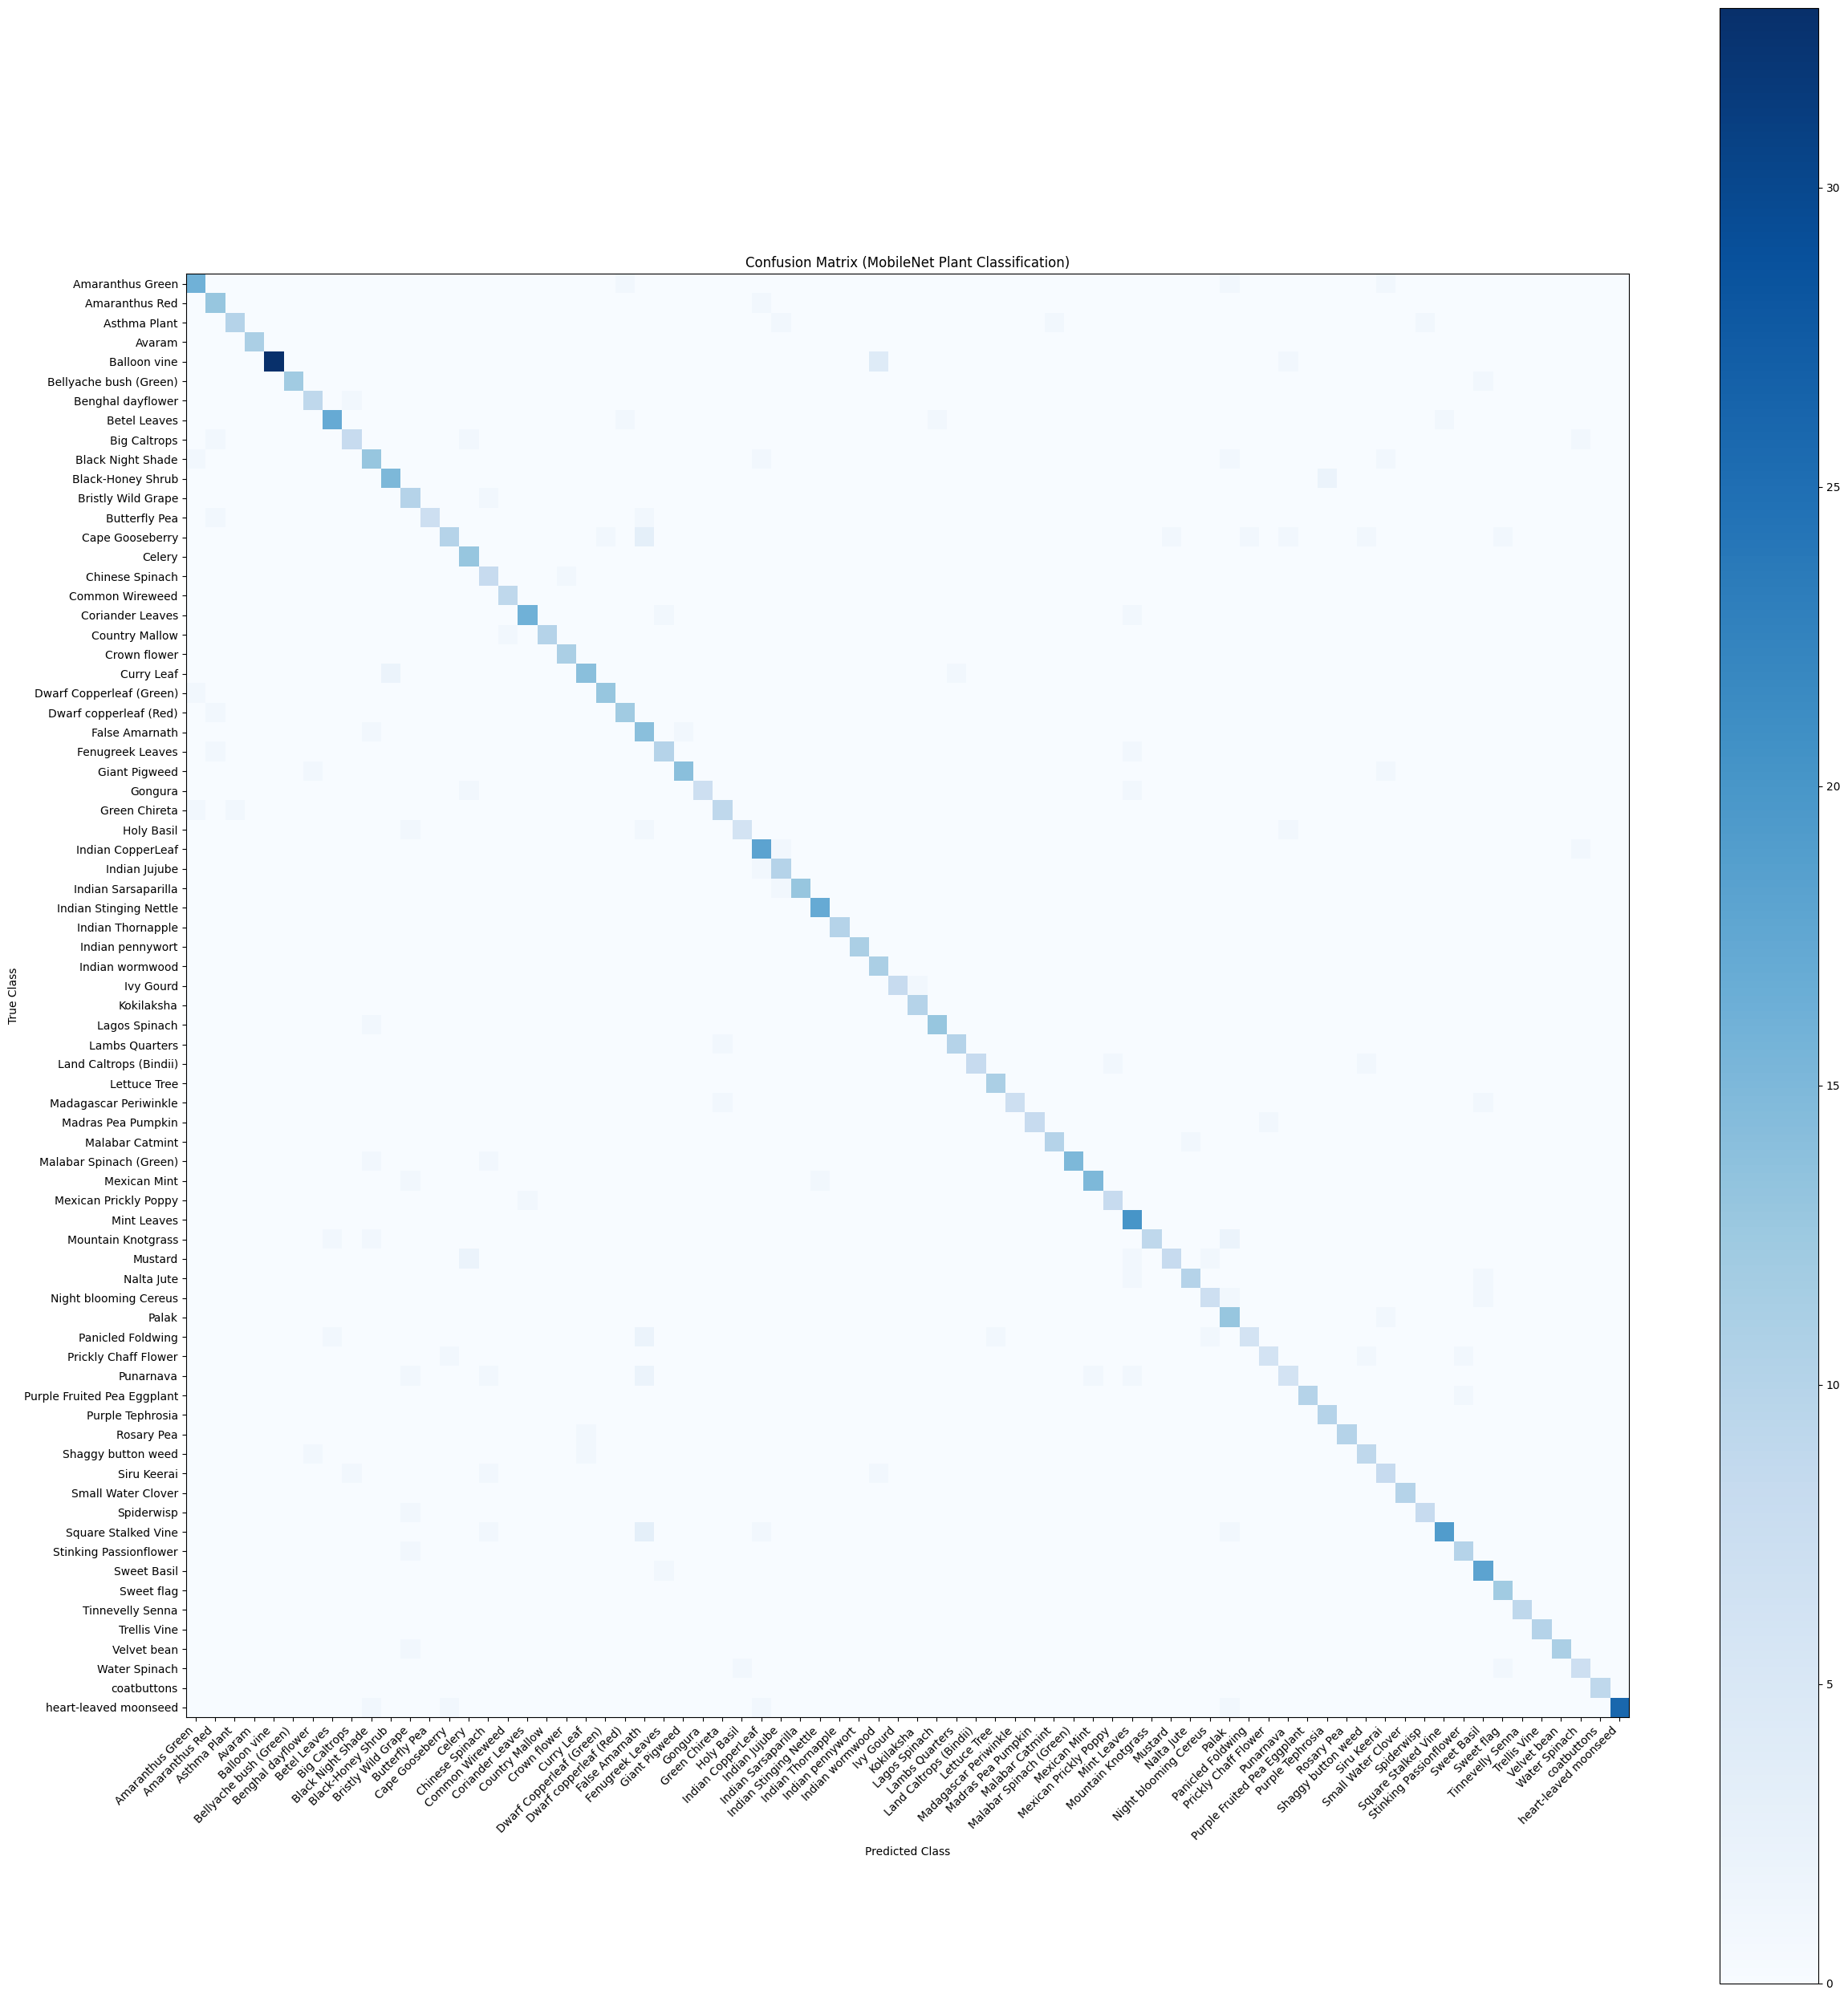

Accuracy: 0.8683127572016461
Precision: 0.8826985406863188
Recall: 0.8683127572016461
F1-Score: 0.8688616382083478


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#predictions = model.predict_generator(test_generator, steps=len(test_generator), verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

# Generate the confusion matrix
cnf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(25,25))
plt.imshow(cnf_matrix, interpolation='nearest', cmap='Blues')
plt.colorbar()
plt.title("Confusion Matrix (MobileNet Plant Classification)")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

class_labels = test_generator.class_indices.keys()

plt.xticks(np.arange(len(class_labels)), class_labels, rotation=45, ha="right")
plt.yticks(np.arange(len(class_labels)), class_labels)
plt.tight_layout()
plt.show()

# Print classification metrics
print("Accuracy:", accuracy_score(true_classes, predicted_classes))
print("Precision:", precision_score(true_classes, predicted_classes, average="weighted"))
print("Recall:", recall_score(true_classes, predicted_classes, average="weighted"))
print("F1-Score:", f1_score(true_classes, predicted_classes, average="weighted"))

In [ ]:

# # Load MobileNetV2 base model
# base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# # Add custom classification head
# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# x = Dense(512, activation='relu')(x)
# x = Dropout(0.5)(x)  # Adding dropout for regularization
# predictions = Dense(num_classes, activation='softmax')(x)

# model = Model(inputs=base_model.input, outputs=predictions)

# # Freeze the layers of the base model
# for layer in base_model.layers:
#     layer.trainable = False

# # Compile the model
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # Train the model
# history = model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.samples // batch_size,
#     epochs=epochs,
#     validation_data=validation_generator,
#     validation_steps=validation_generator.samples // batch_size
# )

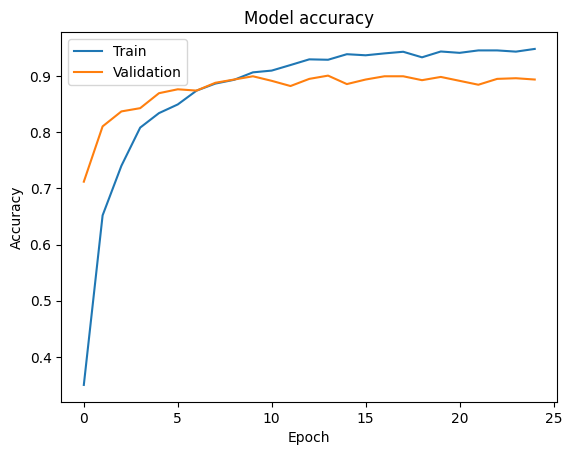

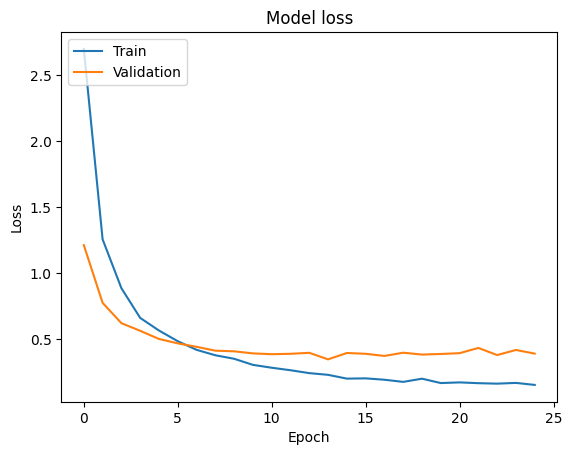

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()